In [1]:
%matplotlib notebook
from SimPEG import Mesh, Utils, PF
import numpy as np

import matplotlib.pyplot as plt

In [2]:
# Load a mesh and data
workDir = '.\\'
mesh = Mesh.TensorMesh.readUBC(workDir + 'Mesh_25m.msh')
survey = Utils.io_utils.readUBCmagneticsObservations(workDir + 'Obs_loc_TMI.obs')


In [3]:
def rotate(xyz, center, theta, phi):
    """
      Rotate scatter points in column format around a center location

      INPUT
      :param: xyz nDx3 matrix
      :param: center xyz location of rotation
      :param: theta angle rotation around x-axis
      :param: phi angle rotation around z-axis

    """
    xyz = xyz - np.kron(np.ones((xyz.shape[0], 1)), np.r_[center])

    phi = -np.deg2rad(np.asarray(inc))
    theta = -np.deg2rad(np.asarray(dec))

    Rx = np.asarray([[1, 0, 0],
                    [0, np.cos(phi), -np.sin(phi)],
                    [0, np.sin(phi), np.cos(phi)]])

    Rz = np.asarray([[np.cos(theta), -np.sin(theta), 0],
                    [np.sin(theta), np.cos(theta), 0],
                    [0, 0, 1]])

    R = Rz.dot(Rx)
    
    xyzRot = R.dot(xyz.T).T + np.kron(np.ones((xyz.shape[0], 1)), np.r_[center])

    return xyzRot


        

In [4]:
# Define an upright prism by its limits
xn, yn, zn = np.c_[300, 500], np.c_[300, 700], np.c_[-300, -200]

# Create all 8 corners
X, Y, Z = np.meshgrid(xn, yn, zn)
pts = np.c_[Utils.mkvc(X), Utils.mkvc(Y), Utils.mkvc(Z)]

# Rotate the coordinates about its center
inc = -45
dec = 90
orig = np.r_[np.mean(np.r_[xn, yn, zn], axis=1)]
xyz = rotate(
    pts, orig,
    inc, dec
)
ind = Utils.ModelBuilder.PolygonInd(mesh, xyz)
            

<IPython.core.display.Javascript object>


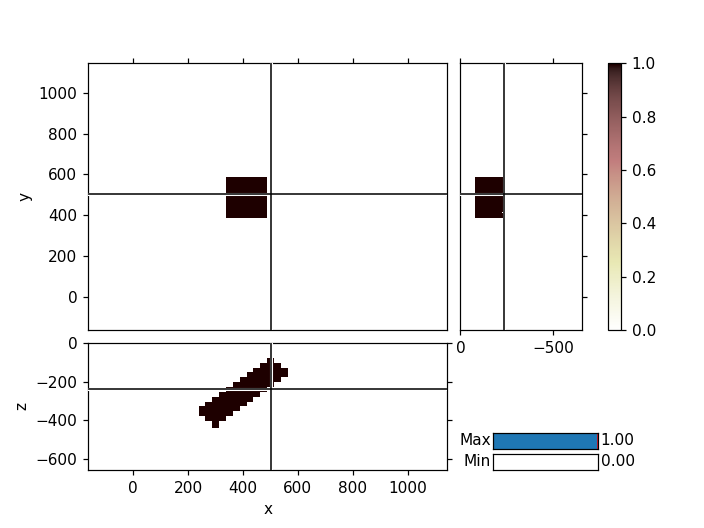

In [10]:
# Create the model from index
m = np.zeros(mesh.nC)
m[ind] = 1

mesh.plot_3d_slicer(m, transparent='slider', pcolorOpts={'cmap':'pink_r'})
